<a href="https://colab.research.google.com/github/DavidTatis/HyperParameter-Tunning/blob/main/NN_MNIST_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example of a NN for MNIST
Source:https://www.kaggle.com/prashant111/mnist-deep-neural-network-with-keras

Libreries

In [ ]:
!pip install scikeras[tensorflow]
!pip install scikeras[tensorflow-cpu]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation, Dropout,BatchNormalization,Input
from tensorflow.keras.optimizers import Adam ,RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras import  backend as K
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from random import random,randrange
from operator import itemgetter


Dataset

In [ ]:
# import dataset
from tensorflow.keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()


# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


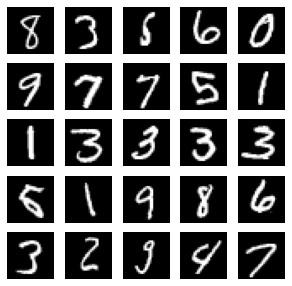

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

Model:

 Import Keras layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

One-hot encoding

In [ ]:
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Preprocessing data

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
print(input_size)
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

784


Network parameters

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
def create_model(num_layers=2,hidden_units_start=256,activation='relu'):
  model2 = Sequential()
  model2.add(Dense(hidden_units_start, input_dim=input_size))
  model2.add(Activation(activation))
  model2.add(Dropout(dropout))
  for layer in range(num_layers-1):
    model2.add(Dense(hidden_units_start))
    model2.add(Activation(activation))
    model2.add(Dropout(dropout))
  
  model2.add(Dense(num_labels))
  model2.add(Activation('softmax'))
  model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
  return model2




In [ ]:
#INITIALIZE POPULATION
def initialize_population(population_size,num_layers,hidden_units_start,activation):
  population_size=3
  param_grid = dict(num_layers=num_layers,hidden_units_start=hidden_units_start,activation=activation)

  potential_num_layers=[None]*population_size
  potential_hidden_units_start=[None]*population_size
  potential_activation=[None]*population_size

  for i in range(0,population_size):
    potential_num_layers[i]=random.choice(param_grid['num_layers'])
    potential_hidden_units_start[i]=random.choice(param_grid['hidden_units_start'])
    potential_activation[i]=random.choice(param_grid['activation'])

  return potential_num_layers,potential_hidden_units_start,potential_activation

In [ ]:
#EVALUATE FITNESS
def evaluate_fitness(potential_num_layers,potential_hidden_units_start,potential_activation):
  model=create_model(num_layers=potential_num_layers,hidden_units_start=potential_hidden_units_start,activation=potential_activation)
  model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
  loss,metric=model.evaluate(x_test,y_test)
  return metric


In [ ]:
# MAIN
epochs=1
model = KerasClassifier(build_fn=create_model,activation='softmax', hidden_units_start=64,epochs=10,num_layers=3, batch_size=batch_size, verbose=0)

# define the grid search parameters and variables
num_layers = [2,3,4]
hidden_units_start = [128,256,512]
activation=['relu','tanh','sigmoid']
population_size=3
# initialize population
potential_num_layers,potential_hidden_units_start,potential_activation=initialize_population(population_size=population_size,num_layers=num_layers,hidden_units_start=hidden_units_start,activation=activation)

# evaluate hyperparams
evaluated_hparams=[]
for i in range(population_size):
  evaluated_hparams.insert(0,{"hparam":i,"metric":evaluate_fitness(potential_num_layers[i],potential_hidden_units_start[i],potential_activation[i])})
  print(evaluated_hparams)



313/313 [==============================] - 1s 4ms/step - loss: 0.2549 - accuracy: 0.9250
[{'hparam': 0, 'metric': 0.925000011920929}]
313/313 [==============================] - 2s 5ms/step - loss: 0.3127 - accuracy: 0.9065
[{'hparam': 1, 'metric': 0.906499981880188}, {'hparam': 0, 'metric': 0.925000011920929}]
313/313 [==============================] - 1s 4ms/step - loss: 0.2567 - accuracy: 0.9289
[{'hparam': 2, 'metric': 0.9289000034332275}, {'hparam': 1, 'metric': 0.906499981880188}, {'hparam': 0, 'metric': 0.925000011920929}]


In [ ]:
# Evolve the hyperparameters
# Selection
sorted_evaluated_params=sorted(evaluated_hparams,key=itemgetter('metric'),reverse=True)
sel_prt=2
rand_prt=2

if(sel_prt+rand_prt>=len(potential_num_layers)):
  print("WARNING: Selections are bigger thant current population")
  print("WARNING: Random selection may not be taken")

top_selection=[]
for i in range(sel_prt):
  top_selection.insert(0,sorted_evaluated_params[i]['hparam'])

rand_selection=[]
i=0
while(i < rand_prt):
  if(len(rand_selection)+len(top_selection)>=len(potential_num_layers)):
    break
    
  rand_hparam=randrange(len(potential_hidden_units_start))
  print("Generated random {}.".format(rand_hparam))
  if(rand_hparam in top_selection or rand_hparam in rand_selection):
    continue

  rand_selection.insert(0,rand_hparam)
  print(potential_num_layers[rand_hparam],potential_hidden_units_start[rand_hparam],potential_activation[rand_hparam])
  i=i+1



Generated random 0.
Generated random 0.
Generated random 0.
Generated random 0.
Generated random 1.
3 256 sigmoid


In [ ]:
#CROSS-OVER OPERATION
def crossover(hparam1,hparam2):
  
